In [ ]:
from google.colab import drive
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from imgaug import augmenters  as iaa
import cv2
import random

In [ ]:
#mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_file = "/content/drive/MyDrive/데이터캡스톤/traffic-signs-data/train.p"
validation_file= "/content/drive/MyDrive/데이터캡스톤/traffic-signs-data/valid.p"
testing_file = "/content/drive/MyDrive/데이터캡스톤/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pkl.load(f)
with open(validation_file, mode='rb') as f:
    valid = pkl.load(f)
with open(testing_file, mode='rb') as f:
    test = pkl.load(f)
     

In [ ]:
WIDTH = 32
HEIGHT = 32

In [ ]:
X_train = train['features']
y_train = train['labels']

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [ ]:
X_valid = valid['features']
y_valid = valid['labels']

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_valid.shape)
print(y_valid.shape)

(4410, 32, 32, 3)
(4410,)


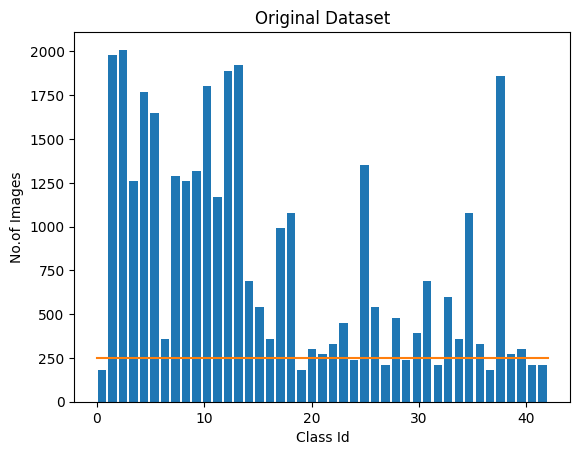

In [ ]:
num_bins = 43
samples_per_bin = 250
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.plot((np.min(y_train), np.max(y_train)), (samples_per_bin, samples_per_bin))
plt.title('Original Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

_, bins = np.histogram(y_train, num_bins)

In [ ]:
print(bins)

[ 0.          0.97674419  1.95348837  2.93023256  3.90697674  4.88372093
  5.86046512  6.8372093   7.81395349  8.79069767  9.76744186 10.74418605
 11.72093023 12.69767442 13.6744186  14.65116279 15.62790698 16.60465116
 17.58139535 18.55813953 19.53488372 20.51162791 21.48837209 22.46511628
 23.44186047 24.41860465 25.39534884 26.37209302 27.34883721 28.3255814
 29.30232558 30.27906977 31.25581395 32.23255814 33.20930233 34.18604651
 35.1627907  36.13953488 37.11627907 38.09302326 39.06976744 40.04651163
 41.02325581 42.        ]


In [ ]:
#데이터 개수 맞추기
print ('total data:', len(X_train))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(y_train)):
    if y_train[i]>= bins[j] and y_train[i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  #print(list_)
  if len(list_)>samples_per_bin:
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))

X_train = np.delete(X_train, remove_list, axis=0)
print ('remaining images:', len (X_train))

y_train = np.delete(y_train, remove_list, axis=0)
print ('remaining labels:', len (y_train))

total data: 34799
removed: 24439
remaining images: 10360
remaining labels: 10360


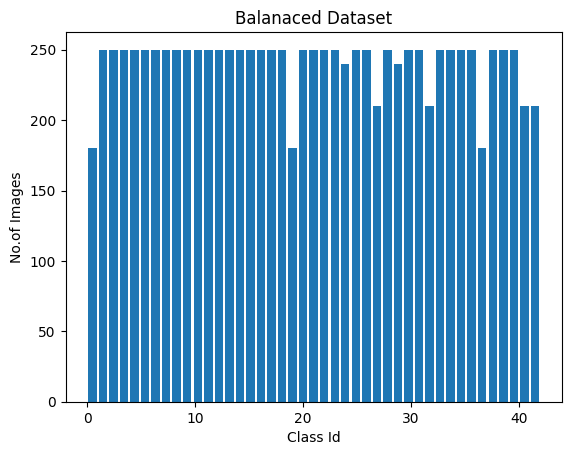

In [ ]:
num_bins = 43
samples_per_bin = 500
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

In [ ]:
#이미지 증식
#이미지 확대
def zoom(image):
  zoom_img = iaa.Affine(scale = (0.9, 1.3))
  image = zoom_img.augment_image(image)
  return image

16


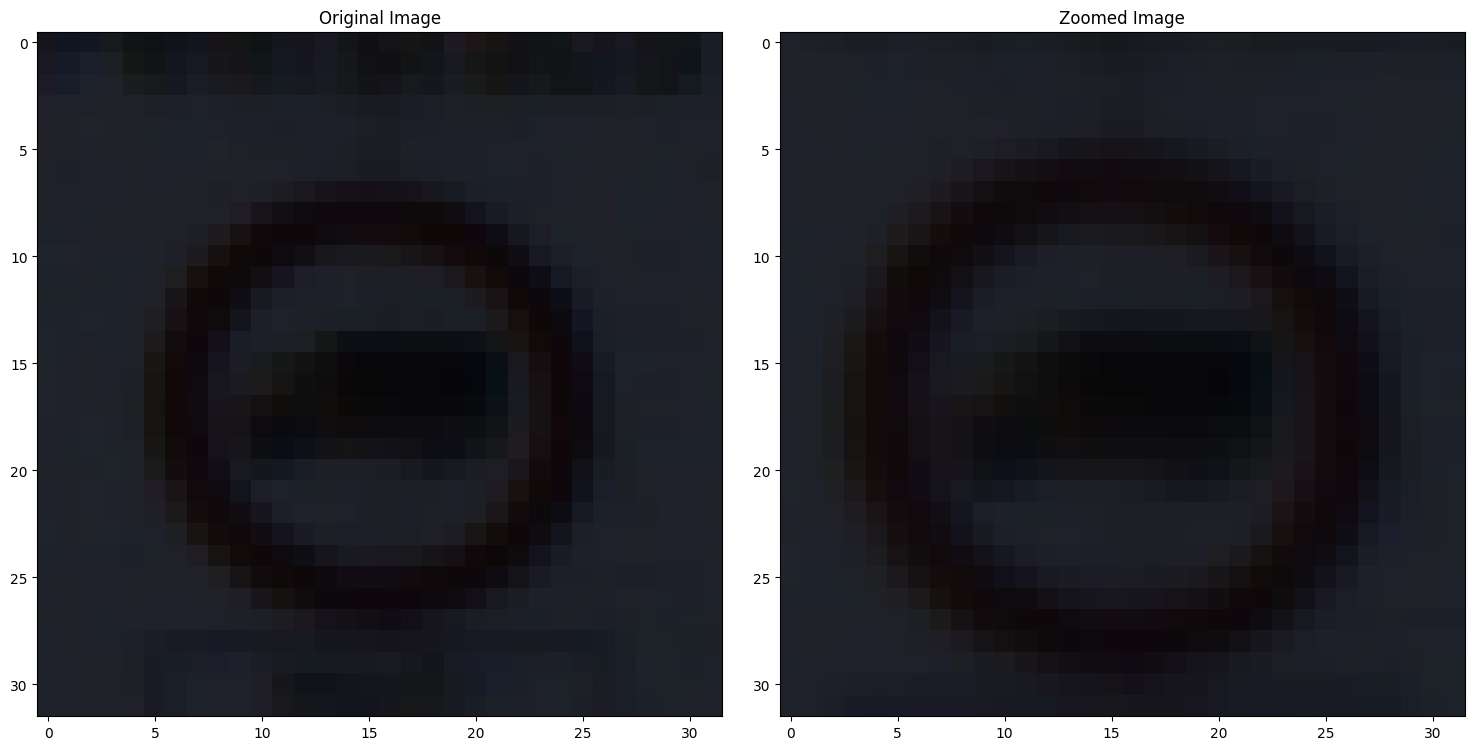

In [ ]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
zoomed_image = zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

print(label)

In [ ]:
#이미지를 좌우 및 상하로 무작위로 이동
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

27


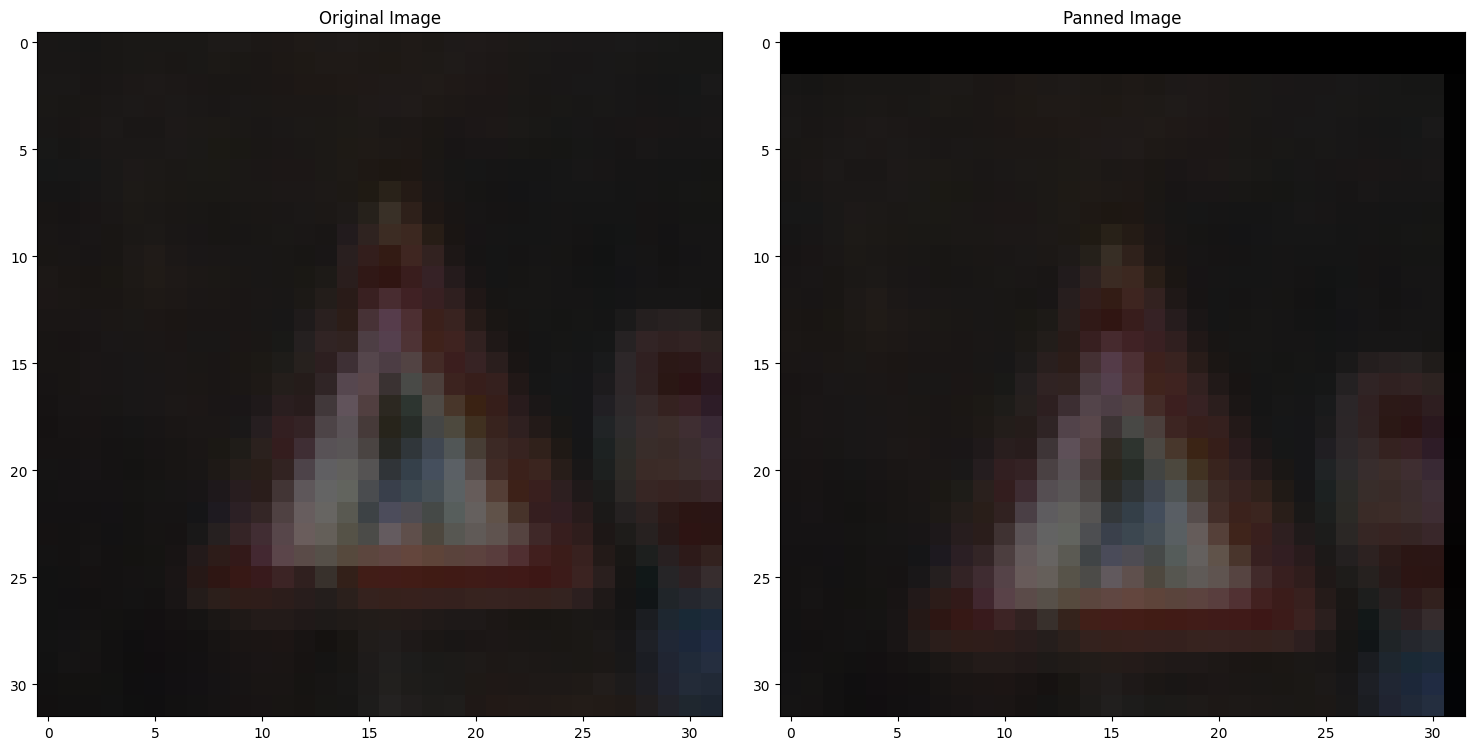

In [ ]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
panned_image = pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

print(label)

In [ ]:
#이미지의 밝기를 무작위로 조절
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.8))
  image = brightness.augment_image(image)
  return image

21


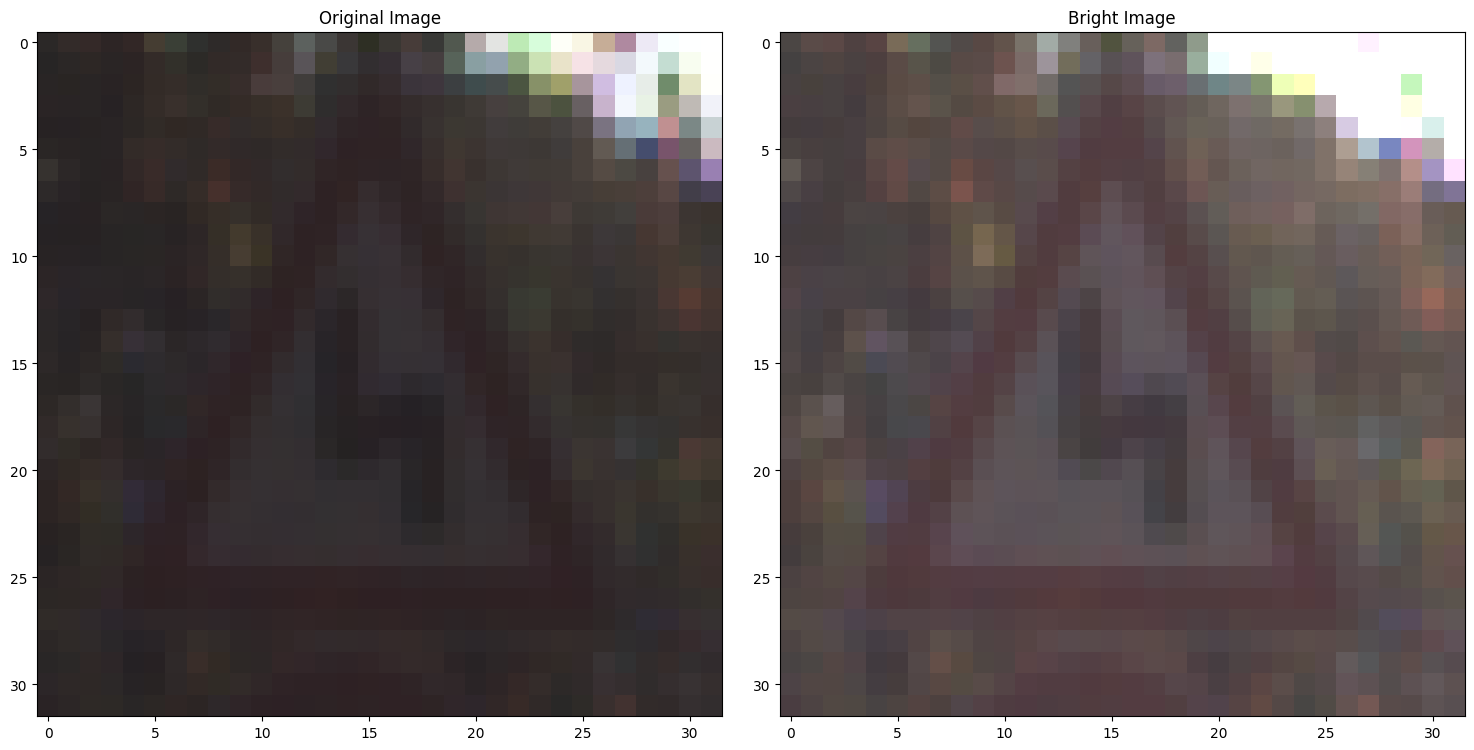

In [ ]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Bright Image')

print(label)

In [ ]:
augmented_zoom_image = []
augmented_zoom_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  zoomed_img = zoom(img)
  augmented_zoom_image.append(zoomed_img)
  augmented_zoom_label.append(label)

augmented_pan_image = []
augmented_pan_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  panned_img = pan(img)
  augmented_pan_image.append(panned_img)
  augmented_pan_label.append(label)

augmented_bright_image = []
augmented_bright_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  bright_img = img_random_brightness(img)
  augmented_bright_image.append(bright_img)
  augmented_bright_label.append(label)

print('Balanced Dataset Before Augmentation(Image):', X_train.shape)
print('Balanced Dataset Before Augmentation(Label):', y_train.shape)
#change to np array
augmented_zoom_image = np.array(augmented_zoom_image)
augmented_pan_image = np.array(augmented_pan_image)
augmented_bright_image = np.array(augmented_bright_image)
X_train = np.array(X_train)
#concatenate
X_train = np.concatenate((X_train, augmented_zoom_image, augmented_pan_image, augmented_bright_image))


#change to np array
augmented_zoom_label = np.array(augmented_zoom_label) #250
augmented_pan_label = np.array(augmented_pan_label) #250
augmented_bright_label = np.array(augmented_bright_label) #250
y_train = np.array(y_train) #250
#concatenate
y_train = np.concatenate((y_train, augmented_zoom_label, augmented_pan_label, augmented_bright_label))

print('Balanced Dataset After Augmentation(Image):', X_train.shape)
print('Balanced Dataset After Augmentation(Label):', y_train.shape)

Balanced Dataset Before Augmentation(Image): (10360, 32, 32, 3)
Balanced Dataset Before Augmentation(Label): (10360,)
Balanced Dataset After Augmentation(Image): (41440, 32, 32, 3)
Balanced Dataset After Augmentation(Label): (41440,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape, Input, Concatenate, GlobalMaxPool2D
from keras.models import Model

In [ ]:
print(keras.__version__)

2.12.0


In [ ]:
print(X_train[1].shape)

(32, 32, 3)


In [ ]:
def CNN_model():
  model = Sequential()

  #1st layer
  model.add(Conv2D(24, kernel_size=(5,5), strides=(1,1), input_shape=(WIDTH, HEIGHT,3), activation='relu'))

  #2nd layer
  model.add(Conv2D(36, kernel_size=(5,5), strides=(1,1), activation='relu'))

  #3rd layer
  model.add(Conv2D(48, kernel_size=(5,5), strides=(1,1), activation='relu'))
  
  #4th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

  #5th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))


  #1st Dense Layer
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  #model.add(Dropout(0.5))

  #2nd Dense Layer
  model.add(Dense(125, activation='relu'))
  #model.add(Dropout(0.5))

  #3rd Dense Layer
  model.add(Dense(75, activation='relu'))
  #model.add(Dropout(0.5))

  #output
  model.add(Dense(43, activation='softmax'))
  
  #Compile model
  model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
     

In [ ]:
model = CNN_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 48)        43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 250)               4

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
def labels_to_one_hot(y_labels, num_classes):
  matrix_eye = np.eye(num_classes)
  y_labels_array = []
  for i in range(len(y_labels)):
    y_labels_array.append(matrix_eye[:,y_labels[i]])
  return np.array(y_labels_array)

In [ ]:
y_train = labels_to_one_hot(y_train, 43)
y_valid = labels_to_one_hot(y_valid, 43)

print(y_train.shape)
print(y_valid.shape)

(41440, 43)
(4410, 43)


In [ ]:
history = model.fit(x=X_train, y=y_train, 
                    batch_size=32, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_valid, y_valid), 
                    shuffle=True)

Epoch 1/10
1295/1295 [==============================] - 19s 7ms/step - loss: 1.2156 - accuracy: 0.7302 - val_loss: 0.5179 - val_accuracy: 0.8710
Epoch 2/10
1295/1295 [==============================] - 10s 8ms/step - loss: 0.2909 - accuracy: 0.9358 - val_loss: 0.2352 - val_accuracy: 0.9363
Epoch 3/10
1295/1295 [==============================] - 9s 7ms/step - loss: 0.1456 - accuracy: 0.9655 - val_loss: 0.3085 - val_accuracy: 0.9181
Epoch 4/10
1295/1295 [==============================] - 9s 7ms/step - loss: 0.0973 - accuracy: 0.9758 - val_loss: 0.1183 - val_accuracy: 0.9744
Epoch 5/10
1295/1295 [==============================] - 9s 7ms/step - loss: 0.0660 - accuracy: 0.9840 - val_loss: 0.2344 - val_accuracy: 0.9542
Epoch 6/10
1295/1295 [==============================] - 9s 7ms/step - loss: 0.0499 - accuracy: 0.9885 - val_loss: 0.1785 - val_accuracy: 0.9669
Epoch 7/10
1295/1295 [==============================] - 9s 7ms/step - loss: 0.0408 - accuracy: 0.9902 - val_loss: 0.1655 - val_accurac

Text(0.5, 0, 'epoch')

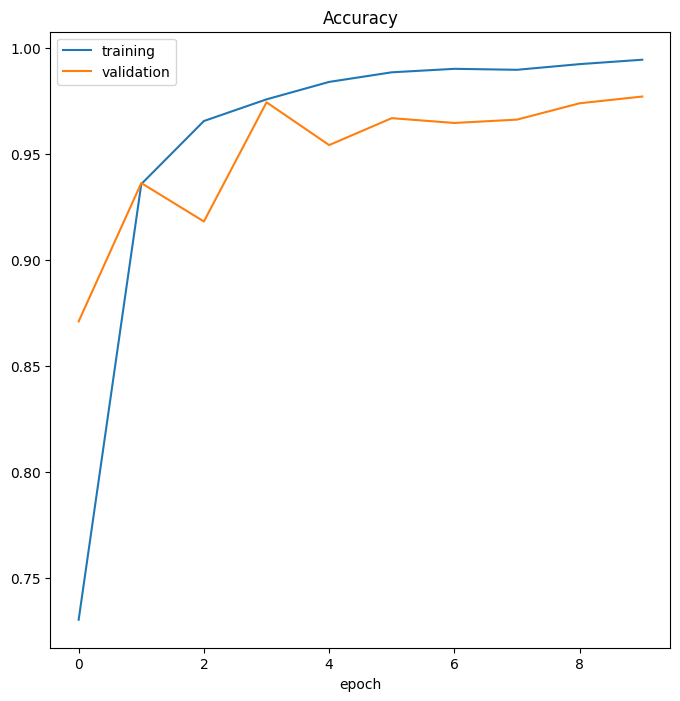

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

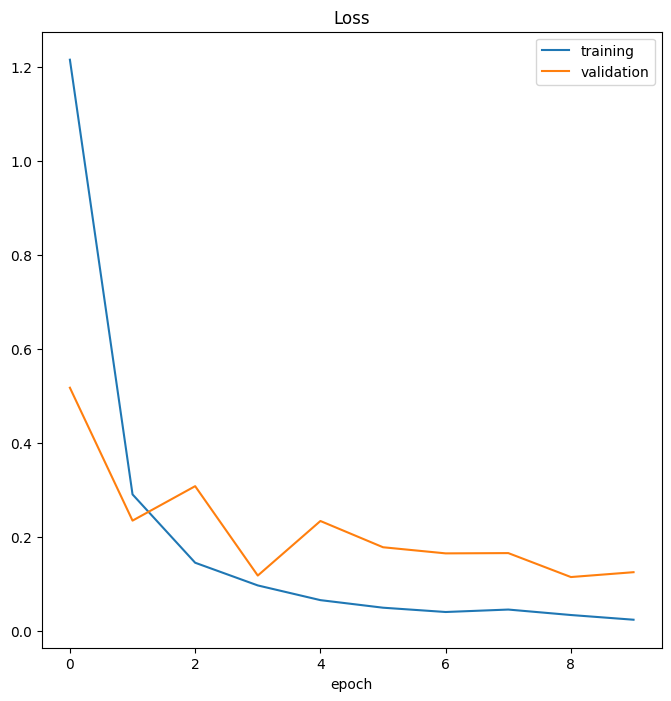

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
X_test = test['features']
y_test = test['labels']

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [ ]:
y_test = labels_to_one_hot(y_test, 43)

Actual:  1
1/1 [==============================] - 0s 283ms/step
Prediction:  1


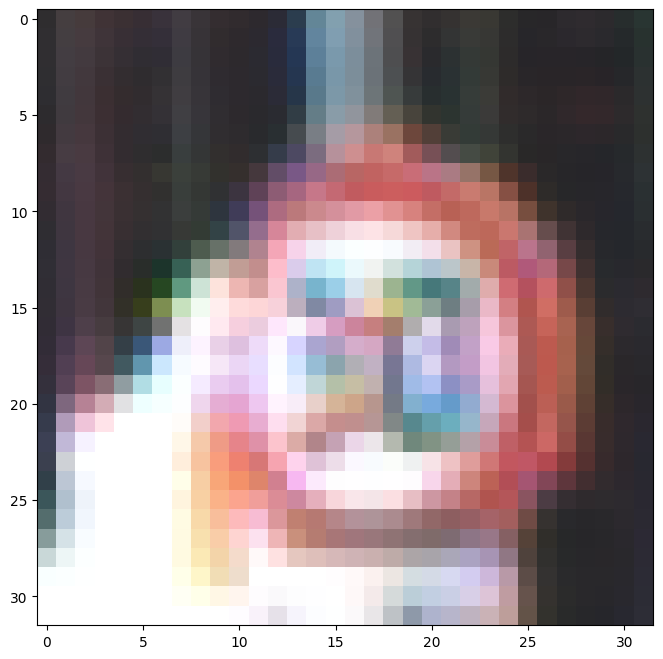

In [ ]:
index = random.randint(0,len(X_test)-1)
img_testing = X_test[index]
label_testing = y_test[index]

plt.imshow(img_testing)
print ("Actual: ", np.argmax(label_testing))
img_testing = img_testing.reshape(-1, WIDTH,HEIGHT,3)

print ("Prediction: ", np.argmax(model.predict(img_testing)))

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
395/395 [==============================] - 2s 5ms/step - loss: 0.2667 - accuracy: 0.9568
test loss, test acc: [0.2666741907596588, 0.956769585609436]


In [ ]:
import os

# Define the file path for the model
model_path = os.path.expanduser('/content/drive/MyDrive/데이터캡스톤/traffic_sign_classifier.h5')

# Save the model to the file path
model.save(model_path)